# Iris dataset

The Iris Dataset contains length and width of sepals and petals of three species of Iris (Iris setosa, Iris virginica and Iris versicolor).

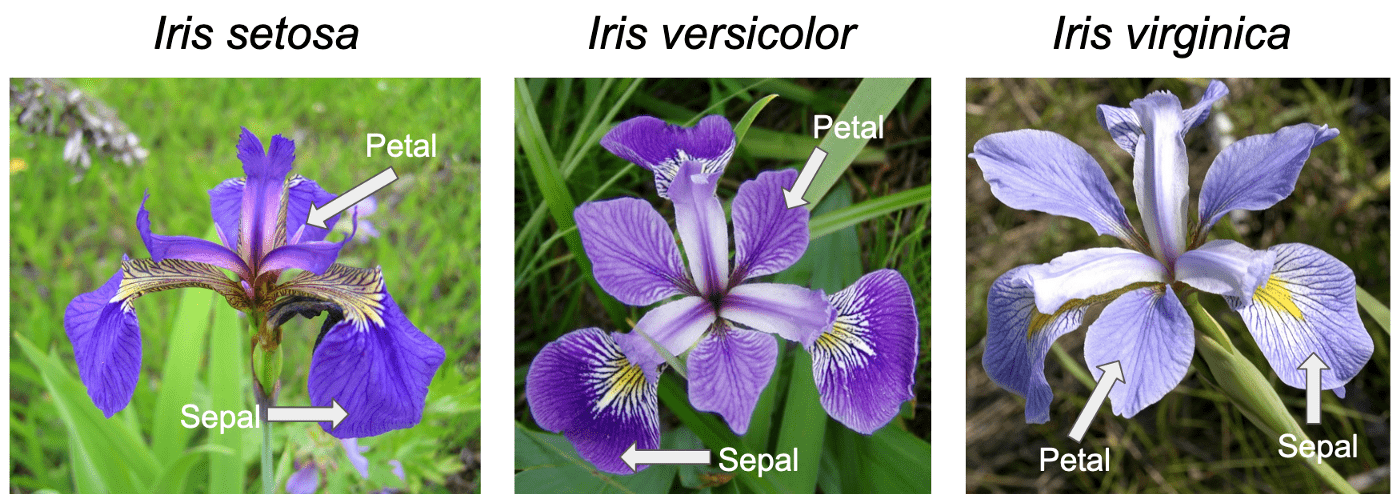

In the table below, some records from this data set can be seen.

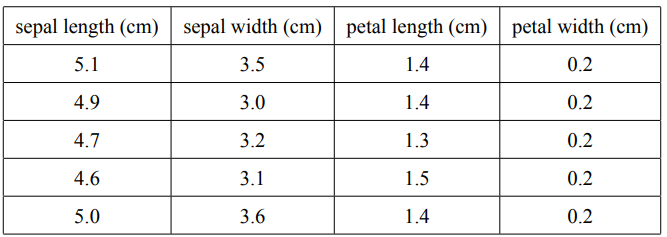

In [1]:
from sklearn.datasets import load_iris
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from numpy import log,dot,exp,shape
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression as lr2
from sklearn.metrics import log_loss

# logistic regression
  ### Logistic regression is a statistical analysis method to predict a binary outcome, such as yes or no, based on prior    observations of a data set.
* Logistic regression is used to predict a categorical dependent variable using a given set of independent variables.
* Logistic regression is used to solve classification problems.
* In logistic regression, we predict the values of categorical variables.
* The maximum likelihood estimation method is used to estimate the accuracy.
* In logistic regression, the existence of a linear relationship between the dependent and independent variables is not required.

### Binary Classification on IRIS :
    As its name suggests, in this category of problems, there are only two classes and each of the samples belongs to one of the classes.

### load data 

In [2]:
data = load_iris()

We normalize the data and divide it into three categories: training 1, testing 2, and validation 3 (80% of all data for training, 10% for testing and 10% for validation)

In [3]:
x_train,x_test,y_train,y_test=train_test_split(data.data,data.target,test_size=0.2)
x_test,x_val,y_test,y_val =train_test_split(x_test,y_test,test_size=0.5)

In [4]:
X_train_norm = (x_train - x_train.min()) / (x_train.max() - x_train.min())
X_test_norm = (x_test - x_test.min()) / (x_test.max() - x_test.min())
X_val_norm = (x_val - x_val.min()) / (x_val.max() - x_val.min())

### Implementation of logistic regression model

In [5]:
class LogidticRegression:
    def sigmoid(self,z):
        sig = 1/(1+exp(-z))
        return sig
    def initialize(self,X):
        weights = np.zeros((shape(X)[1]+1,1))
        X = np.c_[np.ones((shape(X)[0],1)),X]
        return weights,X
    def fit(self,X,y,alpha=0.0001,iter=100):
        weights,X = self.initialize(X)
        def cost(theta):
            z = dot(X,theta)
            cost0 = y.T.dot(log(self.sigmoid(z)))
            cost1 = (1-y).T.dot(log(1-self.sigmoid(z)))
            cost = -((cost1 + cost0))/len(y)
            return cost
        cost_list = np.zeros(iter,)
        for i in range(iter):
            weights = weights - alpha*dot(X.T,self.sigmoid(dot(X,weights))-np.reshape(y,(len(y),1)))
            cost_list[i] = cost(weights)
        self.weights = weights
        return cost_list
    def predict(self,X):
        z = dot(self.initialize(X)[1],self.weights)
        lis = []
        for i in self.sigmoid(z):
            if i>0.5:
                lis.append(1)
            else:
                lis.append(0)
        return lis

In [6]:
model = LogidticRegression()

In [7]:
cost_list= model.fit(X_train_norm,y_train)

### Error on all data in each step of updating the weights

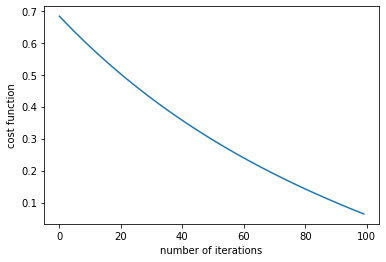

In [8]:
plt.plot(cost_list)
plt.xlabel("number of iterations")
plt.ylabel("cost function")
plt.show()

# KNN
    This algorithm (K nearest neighbor) is one of the most widely used machine learning algorithms, which is part of 
    parameter-free algorithms (i.e., it has no assumptions about data distribution) and lazy leaner (short learning time but  long guessing time). The purpose of this algorithm is to use datasets in which the data points are separate and are 
    placed in several categories.
#### Among the advantages of the KNN algorithm, the following can be mentioned:
* This algorithm is very simple and very easy to implement.
* The interpretation of this algorithm and its output results is very simple.
* This algorithm has very high accuracy.
* The K-nearest neighbor algorithm is a multipurpose algorithm and is used for both regression and classification problems.
* This algorithm can be used in a wide range of problems.

### load data

In [9]:
from sklearn import datasets
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import Normalizer
from collections import Counter
from sklearn.metrics import accuracy_score

In [10]:
iris = datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])

In [11]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [12]:
x= df.iloc[:, :-1]
y= df.iloc[:, -1]
x= np.array(x)
y =np.array(y)

### Data normalization

In [13]:
scaler= Normalizer().fit(x) 
normalized_x= scaler.transform(x)

We write a function that performs the classification in the KNN method. Also, to separate the training data from the test data, use the Leave One Out method, which uses one of the data records for testing and the rest for training.

In [14]:
def distance_ecu(x_train, x_test_point):
    distances= []  
    for row in range(len(x_train)):
        current_train_point= x_train[row] 
        current_distance= 0 
        for col in range(len(current_train_point)): 
            current_distance += (current_train_point[col] - x_test_point[col]) **2
        
        current_distance= np.sqrt(current_distance)
        distances.append(current_distance)
    distances= pd.DataFrame(data=distances,columns=['dist'])
    return distances

In [15]:
def nearest_neighbors(distance_point, K):
    df_nearest= distance_point.sort_values(by=['dist'], axis=0)
    df_nearest= df_nearest[:K]
    return df_nearest

In [16]:
def voting(df_nearest, y_train):
    counter_vote= Counter(y_train[df_nearest.index])
    y_pred= counter_vote.most_common()[0][0]   # Majority Voting
    return y_pred

In [17]:
def KNN_from_scratch(x, y, K):
    y_pred=[]
    loo = LeaveOneOut()
    loo.get_n_splits(x)  
    for i, (train_index, test_index) in enumerate(loo.split(x)):
        x1 = np.delete(x,test_index,0)
        y1 = np.delete(y,test_index,0)
       
        t =x[test_index].flatten()
        distance_point  = distance_ecu(x1, t)  
        df_nearest_point= nearest_neighbors(distance_point, K)  
        y_pred_point    = voting(df_nearest_point, y1)
        y_pred.append(y_pred_point)
    return y_pred  

In [18]:
K=3
y_pred_knn= KNN_from_scratch(normalized_x, y,K)
print(y_pred_knn)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]


# Decision Tree
    Many types of decision trees are used in machine learning for the problems of classification and classification of 
    objects based on the trained features. Also, this method can be used in regression problems or a method to predict 
    continuous results of unseen data.

In [19]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

First, we read the data and divide it into two parts, training and testing. (30% of the data is considered for testing.)

In [20]:
iris = datasets.load_iris()
df1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])

In [21]:
x1= df1.iloc[:, :-1]
y1= df1.iloc[:, -1]
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(x1,y1, test_size=0.3, random_state=0) 

In this part, we want to create a classifier with the help of the DecisionTreeClassifier function from the sklearn Python library.
We want to use the search grid method to find the optimal parameters for this classification.
The considered parameters for the decision tree are as follows:
*  criterion
*  max_depth
*  min_samples_split
*  max_leaf_nodes

In [22]:
tree = DecisionTreeClassifier(random_state=42)
tree = tree.fit(X_train_1,y_train_1)

In [23]:
pred = tree.predict(X_test_1)
acc = metrics.accuracy_score(y_test_1, pred)
print(acc)

0.9777777777777777


### criterion

In [24]:
param_grid = {'criterion' : ['gini', 'entropy']}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, verbose=1, cv=3)
grid_search_cv.fit(X_train_1, y_train_1)
print(grid_search_cv.best_params_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
{'criterion': 'gini'}


### max_depth

In [25]:
param_grid = {'max_depth':[1,2,3,4,5,8,16,32]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, verbose=1, cv=3)
grid_search_cv.fit(X_train_1, y_train_1)
print(grid_search_cv.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
{'max_depth': 3}


### min_sample_split

In [26]:
param_grid = {'min_samples_split': [2,3,4,5,8,12,16,20]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, verbose=1, cv=3)
grid_search_cv.fit(X_train_1, y_train_1)
print(grid_search_cv.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
{'min_samples_split': 2}


### max_leaf_nodes

In [27]:
param_grid = {'max_leaf_nodes': list(range(2,20,1))}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, verbose=1, cv=3)
grid_search_cv.fit(X_train_1, y_train_1)
print(grid_search_cv.best_params_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
{'max_leaf_nodes': 4}


We trained the best model we obtained in the previous part on the training data and then tested it on the test data.

In [28]:
param_grid = {'max_depth':[3], 'max_leaf_nodes':[4], 'min_samples_split': [2],'criterion' : ['gini']}
grid_search_cv_1 = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, verbose=1, cv=3)
grid_search_cv_1.fit(X_train_1, y_train_1)
preds1 = grid_search_cv_1.predict(X_test_1)
acc_score =  metrics.accuracy_score(y_test_1, preds1)
print(acc_score)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
0.9777777777777777


### Confusion matrix related to this classification

In [29]:
confusion_matrix(y_test_1, preds1)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)